<center>
    <h1 style="color:blue"> YSU MMF, Python, Spring 2021 </h1>
    <h2 style="color:blue"> Lecture 30 </h2>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Classes

- Create a class `Rectangle`, with attributes `width`, `height`, `x`, `y`
- Add methods `addwh`, `Area`, `Draw`

- Initiate an instance of that class, and do some operations

- Create a child class `Square`, and add a function `InscribeCircle`
- Initiate an instance of the class `Square`, and do some operations

In [2]:
class Rectangle:
       
    def __init__(self, width, height, x, y):
        self.width = width
        self.height = height
        self.x = x
        self.y = y
        
    def Area(self):
        return self.width*self.height
    
    def Draw(self):
        xcoord = [self.x, self.x, self.x + self.width, self.x + self.width,self.x]
        ycoord = [self.y, self.y + self.height, self.y + self.height,self.y, self.y]
        plt.plot(xcoord, ycoord)
        plt.axis('equal')
    

In [3]:
r1 = Rectangle(10, 20, 0, 0)

In [4]:
r2 = Rectangle(20, 20, 0, 0)

In [5]:
r1.width, r2.width

(10, 20)

In [6]:
r2.Area()

400

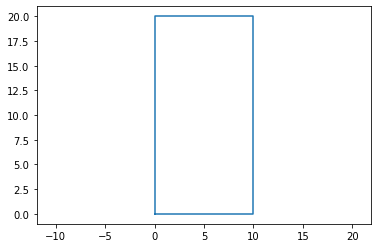

In [7]:
r1.Draw()

In [18]:
class Square(Rectangle):
    
    def __init__(self, size = 0, x = 0, y = 0):
        self.size = size
        Rectangle.__init__(self, width = size, height = size, x = x, y = y)
        
    def InscribeCircle(self):
        self.Draw()
        t = np.linspace(0, 2*np.pi, 100)
        xx = self.x + self.size/2 + (self.size/2)*np.cos(t)
        yy = self.x + self.size/2 +(self.size/2)*np.sin(t)
        plt.plot(xx,yy, c = 'r')

In [19]:
s1 = Square(size = 10)

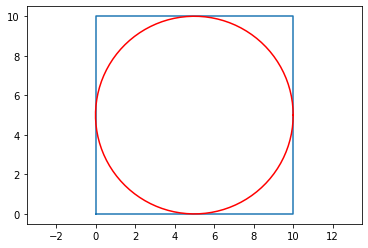

In [20]:
s1.InscribeCircle()

In [21]:
s1 = Square(20,10,10)

In [22]:
s1.Area()

400

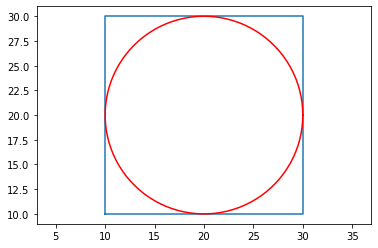

In [23]:
s1.InscribeCircle()

## SKLearn Machine Learning Library

- Load some Classification Data from `sklearn` and split into Test/Train Datasets
- Run some Classification Algorithms on that Dataset and calculate the accuracy of the prediction

- Load some Regression Data from `sklearn` and and split into Test/Train Datasets
- Run some Regression Algorithm on that Dataset, calculate the MSE

- Create a synthetic some clustering Dataset, and run some algorithm for clustering

In [26]:
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()

In [31]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
type(iris)

sklearn.utils.Bunch

In [34]:
X1 = iris.data
y1 = iris.target

In [36]:
X1[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [41]:
y1[:3] 

array([0, 0, 0])

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
from sklearn.model_selection import train_test_split as tts

In [46]:
X1_train, X1_test, y1_train, y1_test = tts(X1, y1, test_size = 0.2)

In [47]:
X1.shape

(150, 4)

In [49]:
X1_train.shape, X1_test.shape

((120, 4), (30, 4))

In [51]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [56]:
knn = KNeighborsClassifier(n_neighbors=7)

In [57]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
y_pred = knn.predict(X1_test)
y_pred

array([2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 1, 0])

In [59]:
y1_test

array([2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 1, 0])

In [62]:
sum(y_pred == y1_test)/len(y_pred)

0.9333333333333333

In [63]:
knn.score(X1_test, y1_test)

0.9333333333333333

In [65]:
x_new = [[30, 10, 5, 20]]

In [66]:
knn.predict(x_new)

array([2])

In [67]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [69]:
lda = LinearDiscriminantAnalysis()

In [70]:
lda.fit(X1_train, y1_train)

LinearDiscriminantAnalysis()

In [73]:
lda.predict(X1_test)

array([2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 1, 0])

In [74]:
lda.score(X1_test, y1_test)

0.9666666666666667

In [75]:
from sklearn.datasets import load_boston

In [76]:
X2, y2 = load_boston(return_X_y=True)

In [79]:
X2[:1]

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [78]:
y2[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [85]:
X2_train, X2_test, y2_train, y2_test = tts(X2, y2, test_size = 0.2)

In [86]:
X2.shape

(506, 13)

In [82]:
knr = KNeighborsRegressor

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()

In [87]:
sc.fit(X2_train)

StandardScaler()

In [102]:
knr.fit(sc.transform(X2_train), y2_train)

TypeError: fit() missing 1 required positional argument: 'y'

# Fashion MNIST with Decision Trees and Random Forest

In [106]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(data_id=40996) 

In [108]:
X = fashion_mnist.data
y = fashion_mnist.target

In [109]:
y[:10]

array(['9', '0', '0', '3', '0', '2', '7', '2', '5', '5'], dtype=object)

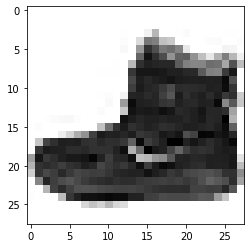

In [105]:
pic = X[0].reshape(28, 28)
plt.imshow(pic, cmap="gray_r") #colormap is inverted gray

In [110]:
X_train, X_test, y_train , y_test = tts(X,y, test_size = 0.2, random_state = 1)

In [111]:
X_train.shape

(56000, 784)

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [114]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [116]:
dt.score(X_test, y_test)

0.798

In [117]:
rf.score(X_test, y_test)

0.8830714285714286

### Testing on real Data

In [118]:
from skimage import io
from skimage.transform import resize
from skimage.util import img_as_ubyte

img = io.imread('https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2Fa305185b-5462-4832-851e-b4029c0f125d.png?fit=scale-down&source=next&width=700')

In [119]:
#reading the shape of the img matrix
img.shape

(467, 700, 4)

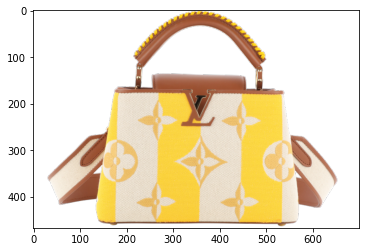

In [120]:
plt.imshow(img)

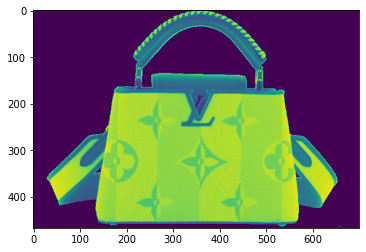

In [121]:
#in img, we have 4 layers (r,g,b, and something else), 
#I am taking just one of the layers
im_1 = img[:,:,1]
plt.imshow(im_1)

In [122]:
#I am resizing the image to 28x28, since all images in the Dataset were of that shape
im_resized = resize(im_1, output_shape=(28,28))
#Important thing: above, in the im_resized, entries are reals from 0 to 1 (intensities 
# of a color in that range). But in the Dataset, values are integers from 0 to 255, so I need 
# to transform to this format
im_resized = img_as_ubyte(im_resized)

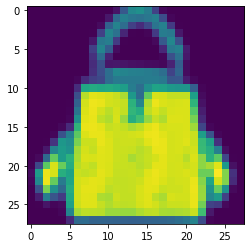

In [123]:
plt.imshow(im_resized)

In [124]:
#In the dataset, our 28x28 images are represented as one 784-dim array, so we need 
# to transform to that shape
im_for_test = im_resized.flatten()

In [125]:
#predicting
# here .reshape(1,-1) is to make from a vector of the form [] a matrix of the form [[]]
# just run np.array([1,2,3]).reshape(1,-1) to see the effect
rf.predict(im_for_test.reshape(1,-1))
##Please compare with the labels at https://github.com/zalandoresearch/fashion-mnist#labels
## No 8 label is "bag"

array(['8'], dtype=object)

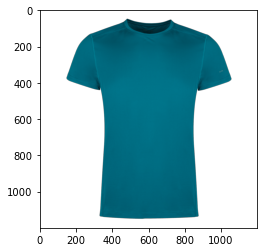

In [126]:
# Another example
img = io.imread('https://static.zajo.net/content/mediagallery/zajo_dcat/image/product/types/X/9087.png')
plt.imshow(img)

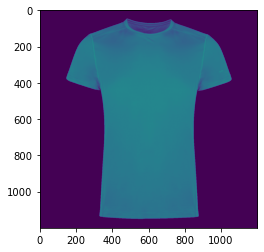

In [127]:
#taking one of the layers
im_1 = img[:,:,1]
plt.imshow(im_1)

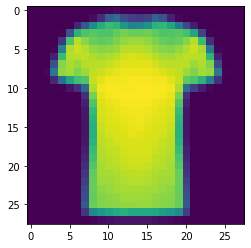

In [128]:
im_resized = resize(im_1, output_shape=(28,28))
im_resized = img_as_ubyte(im_resized)
plt.imshow(im_resized)

In [129]:
im_for_test = im_resized.flatten()

In [130]:
rf.predict(im_for_test.reshape(1,-1))
# label 0 = "T-shirt/top"

array(['0'], dtype=object)

# Fashion MNIST with Simple Neural Network

In [25]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
tf.__version__

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=10)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
